# Conditional Gaussian simulation
The goal is to simulate conditional Gaussian distribution for 1D Gaussian arrays

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [63]:
# Get information about a function:
#np.info(scipy.linalg.toeplitz)
#np.info(np.arange)
#np.info(np.random.normal)
#np.info(np.random.randn)
#np.info(scipy.linalg.cholesky)
#np.info(np.linalg.solve)


First we simulate a centered Gaussian vector $X\in\mathbb{R}^N$ with covariance matrix:
$$
\Gamma(i,j) = \max(d - |i-j|,0),\quad 0\leq i,j\leq N-1.
$$
It is the covariance of the restriction to $\{0,\dots,N-1\}$ of the Gaussian random field over $\mathbb{Z}$ defined by
$$
\tilde{X}(i) = \sum_{k=1}^d Y_{i+k},\quad i\in\mathbb{Z},
$$
where $Y = (Y_i)_{i\in\mathbb{Z}}$ are iid standard Gaussian r.v. (with distribution $\mathcal{N}(0,1)$).

One can see $X$ as a fitered version of $Y$ with an indicator function of width $d$:
$$
\tilde{X}(i) = \left(\boldsymbol{1}_{\{-d+1,\dots,0\}} \ast Y\right)(i)
$$
In particular, as soon as the distance between $i$ and $j$ is larger than $d$, $X(i)$ and $X(j)$ are independent.

In [4]:
def covariance_and_cholesky(N,d):    
    c = np.zeros(N)
    if d<N:
        c[:d] = np.arange(d,0,-1)
    else:
        c = np.arange(d,d-N,-1)
    Gamma = scipy.linalg.toeplitz(c)
    L = scipy.linalg.cholesky(Gamma,lower=True)
    return((Gamma,L))
N = 8
d = 2
Gamma, L = covariance_and_cholesky(N,d)
print('Covariance Gamma:')
print(Gamma)
print('Cholesky decomposition of Gamma:')
print(L)
print('Check Cholesky decomposition:')
print(scipy.linalg.norm(L @ L.T - Gamma))

X = L @ np.random.randn(N)
print('Random vector X~N(0,Gamma):')
print(X)

# check the covariance matrix from sampling:
C=np.zeros((N,N))
Nit = 10**5
for i in range(Nit):
    X = L @ np.random.randn(N)
    X.shape = (N,1)
    C += X @ X.T
C /= Nit
print('Difference between covariance and empirical Gram matrix')
print(scipy.linalg.norm(C-Gamma))





Covariance Gamma:
[[2. 1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0. 0.]
 [0. 1. 2. 1. 0. 0. 0. 0.]
 [0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 1. 2. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 0. 0. 0. 1. 2.]]
Cholesky decomposition of Gamma:
[[1.41421356 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.70710678 1.22474487 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.81649658 1.15470054 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.8660254  1.11803399 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.89442719 1.09544512 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.91287093 1.08012345
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.9258201
  1.06904497 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.93541435 1.06066017]]
Check Cholesky decomposition:
9.1551

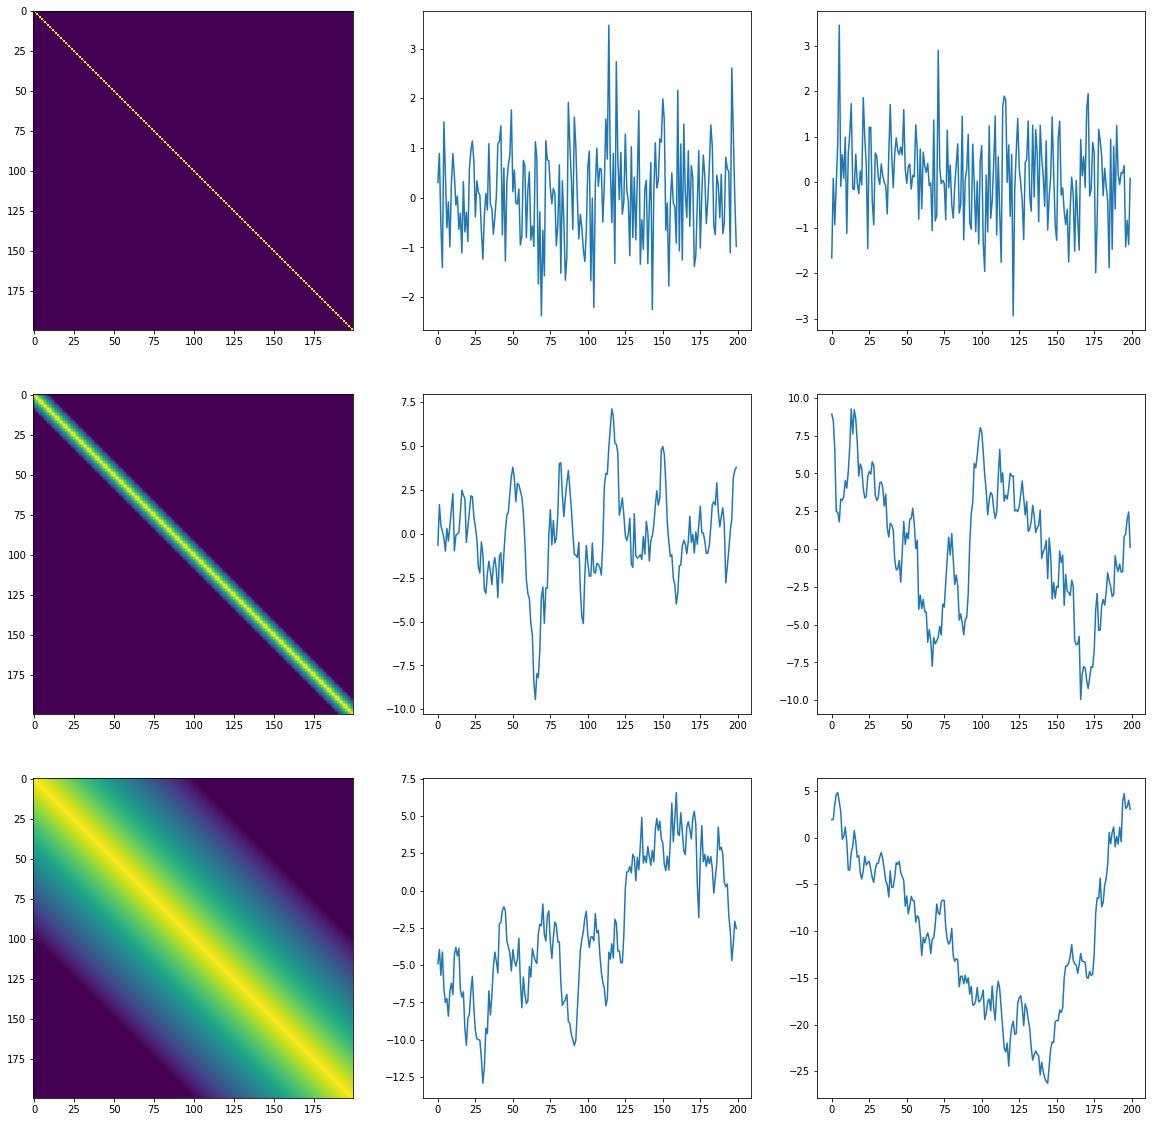

In [5]:
# Larger array considered as a signal:
N = 200
d1 = 1
Gamma1, L1 = covariance_and_cholesky(N,d1)
N = 200
d2 = 10
Gamma2, L2 = covariance_and_cholesky(N,d2)
N = 200
d3 = 100
Gamma3, L3 = covariance_and_cholesky(N,d3)
Gammas = (Gamma1, Gamma2, Gamma3)

# two realizations for each Gaussian distribution
X1 = L1 @ np.random.randn(N)
X1b = L1 @ np.random.randn(N)
X2 = L2 @ np.random.randn(N)
X2b = L2 @ np.random.randn(N)
X3 = L3 @ np.random.randn(N)
X3b = L3 @ np.random.randn(N)
Xs = (X1, X1b, X2, X2b, X3, X3b)


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i in range(3):
    axes[i,0].imshow(Gammas[i])
    axes[i,1].plot(Xs[2*i])
    axes[i,2].plot(Xs[2*i+1])
    

Observe that:
- the model is stationary.
- the larger the support $d$ of the covariance function, the more positively correlated consecutive values are: This can for example be seen by the size of the jumps, or the number of $0$-crossings = number of times the signal changes sign.

## Gaussian contional expectation

Let $A\subset \{0,\dots,N-1\}$ and $B$ is complement set $\{0,\dots,N-1\}\setminus A$.
We will now compute $P = \mathbb{E}(X_A | X_B)$, where $X_A$ and $X_B$ are the restrictions of $X$ to $A$ and $B$ respectively.

We know that $P$ is given by
$$
P = \Gamma_{A,B}(\Gamma_{B,B})^{-1} X_B.
$$



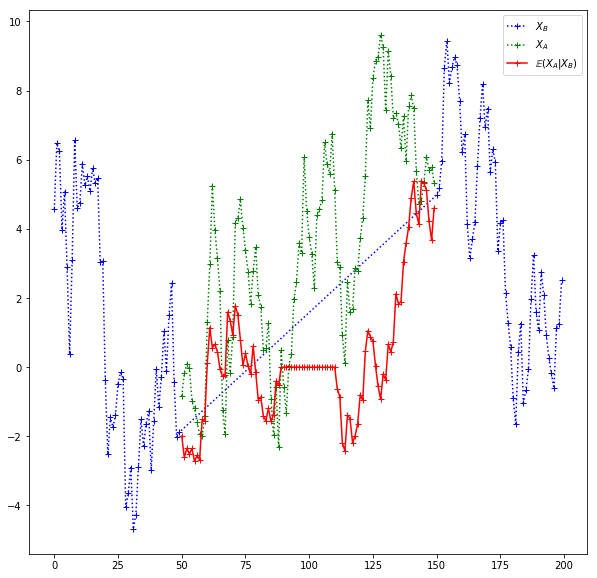

In [9]:
N = 200
boolA = np.full(N, False)
boolA[N//4:3*N//4] = True
boolB = np.logical_not(boolA)

d = 40
Gamma, L = covariance_and_cholesky(N,d)
X = L @ np.random.randn(N)
#print(Gamma)
GammaallB = Gamma[:,boolB]
GammaAB = GammaallB[boolA,:]
GammaBB = GammaallB[boolB,:]
XB = X[boolB]
# GammaAB = Gamma[boolA, boolB] does not work!

P = GammaAB@np.linalg.solve(GammaBB, XB)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.plot(np.arange(N)[boolB], XB,'b+:',label='$X_B$')
axes.plot(np.arange(N)[boolA], X[boolA],'g+:',label='$X_A$')
axes.plot(np.arange(N)[boolA],P,'r+-',label='$\mathbb{E}(X_A | X_B)$')
axes.legend()
#print(np.arange(N)[boolA])
#print(P)



### Question:
Explain flat area in the middle. What is its size ?

## Gaussian contional simulation
Recall that if we observe a realization $x_B$ of $X_B$ then a sample of $X_A$ given $X_B = x_B$ is given by
$$
\Gamma_{A,B}(\Gamma_{B,B})^{-1} x_B + X'_A - \Gamma_{A,B}(\Gamma_{B,B})^{-1}X'_B
$$
where $(X'_A,X'_B)$ is an independent realization of a Gaussian vector having the same distribution as $(X_A,X_B)$.
Also the distribution of $X_A$ given $X_B = x_B$ is
$$
\mathcal{N}\left( \Gamma_{A,B}(\Gamma_{B,B})^{-1} x_B, \Gamma_{A,A} - \Gamma_{A,B}(\Gamma_{B,B})^{-1}\Gamma_{A,B}^T \right)
$$


**Exercise**
1. Compute two or three conditional simulations of $X_A$ given $X_B = x_B$ and add them to the graph of the previous cell.
2. Plot the bounding curves expectation +/- 3 stds of $X_A$ given $X_B = x_B$ to show where the variation of the variance is.
3. Do the same experiment by adding to B point in the middle of the unknown area A.